<a href="https://colab.research.google.com/github/JerryK97/dl12/blob/main/project/dl12_prj01_mid_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DLe: Project01 - start
- ### data: sklearn이 제공하는 당뇨병 데이터  
- ### analysis:  Keras MLP Regression 


# pandas
## MLP
    * 당뇨병 데이터 MLP 회기 분석 모형

> [참고] https://www.tensorflow.org/tutorials/keras/regression?hl=ko

In [ ]:
# import
import matplotlib.pylab as plt
import numpy as np
from sklearn import datasets

In [ ]:
#
# pandas
#
########################################
# 당뇨병 데이터 구조 => DataFrame
# Attribute Information:
#     - age     age in years
#     - sex
#     - bmi     body mass index
#     - bp      average blood pressure
#     - s1      tc, T-Cells (a type of white blood cells)
#     - s2      ldl, low-density lipoproteins
#     - s3      hdl, high-density lipoproteins
#     - s4      tch, thyroid stimulating hormone
#     - s5      ltg, lamotrigine
#     - s6      glu, blood sugar level
# - target  a quantitative measure of disease progression one year after baseline
# [참고] https://wikidocs.net/49981
#       https://suhyun72.tistory.com/entry/%EC%82%AC%EC%9D%B4%ED%82%B7%EB%9F%B0-scikit-learnsklearn-diabetes
#
########################################
df0 = datasets.load_diabetes(as_frame=True)   # data bunch
# Make dataframe from data bunch
df=df0.frame
print(df.shape)
print(df.columns)
df.head()

(442, 11)
Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [ ]:
df.shape

(442, 11)

## Check data

In [ ]:
# NaN, null
df.isna().sum()

age       0.0
sex       0.0
bmi       0.0
bp        0.0
s1        0.0
s2        0.0
s3        0.0
s4        0.0
s5        0.0
s6        0.0
target    0.0
dtype: float64

In [ ]:
# Duplicates
df.duplicated().sum()

0

## target의 값을 결정하는 중요한 특징
- 양의 상관성: bmi, bp, s5
- 반상관성 : s3

<ipython-input-36-96b7d0ac46f8>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


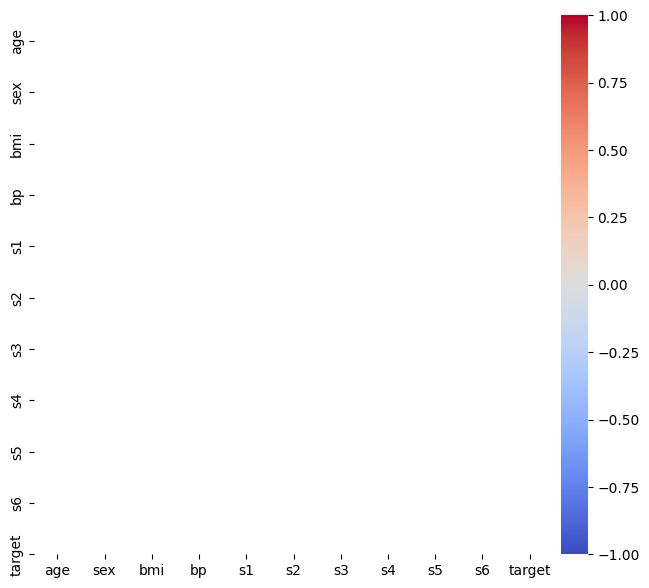

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), 
        xticklabels=df.columns,
        yticklabels=df.columns,
        vmin= -1, vmax=1.0, cmap='coolwarm',
        annot=True, fmt='.2f')
plt.show()

<Axes: >

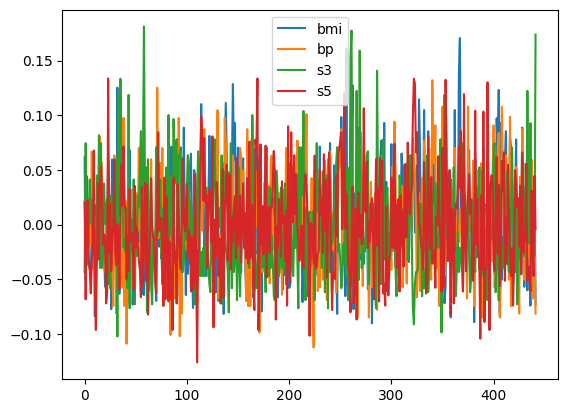

In [ ]:
df[['bmi','bp','s3','s5']].plot()

<Figure size 800x800 with 0 Axes>

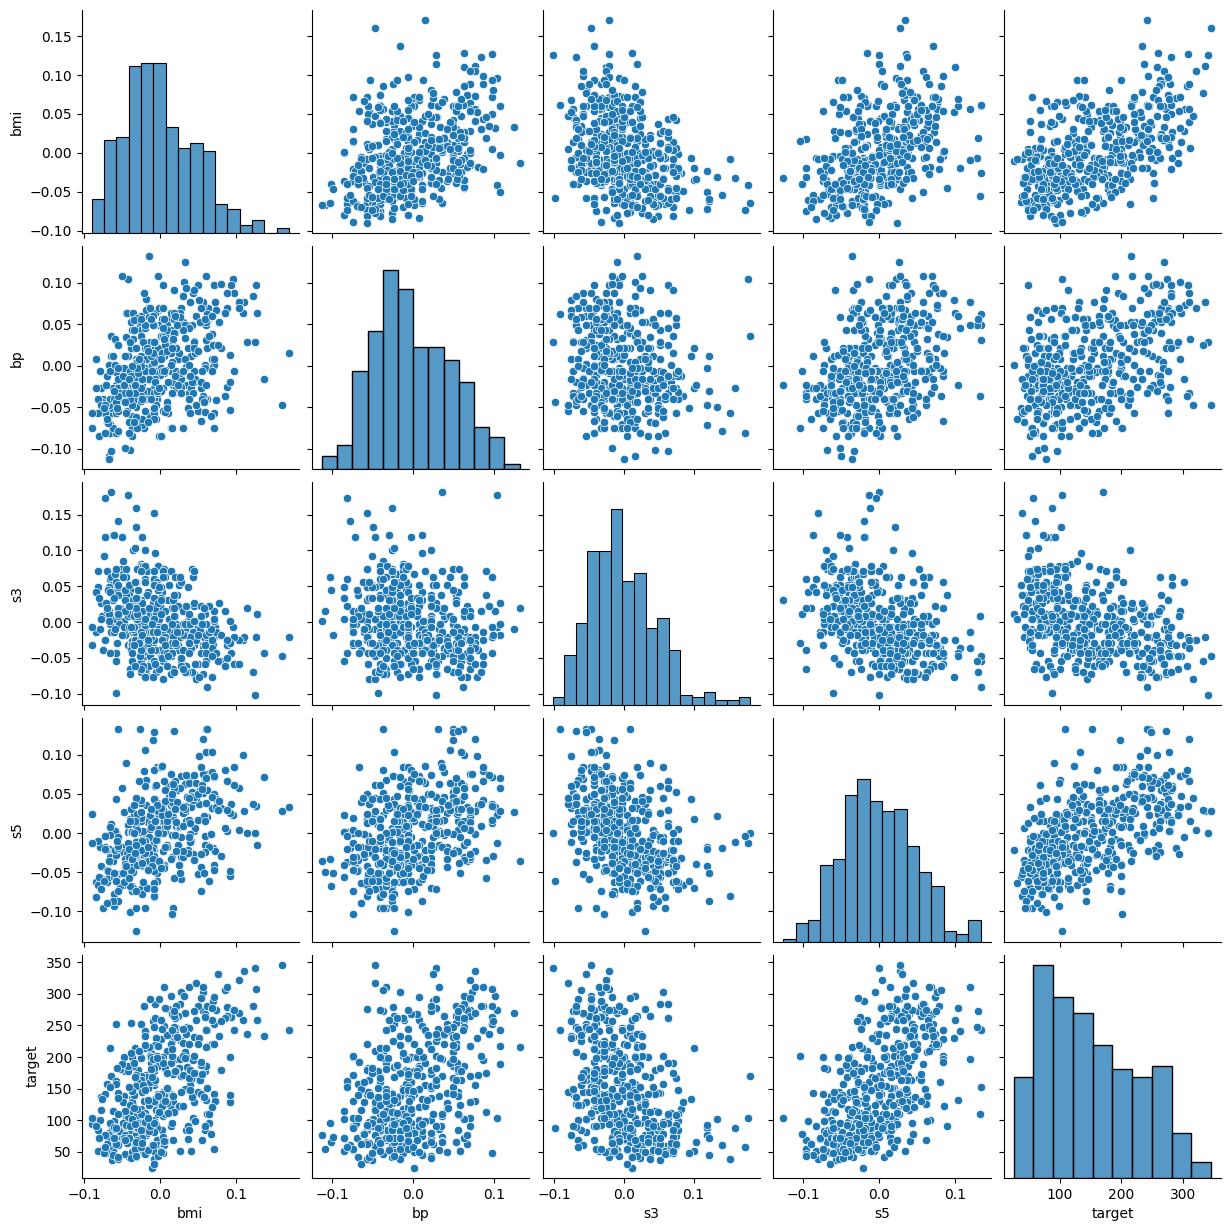

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(df[['bmi', 'bp', 's3','s5','target']])
plt.show()

---

## 데이터 구성
- train data
- test data


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [ ]:
X = df[['bmi', 'bp', 's3','s5']].values
y = df[['target']].values

X.shape,y.shape, type(X),type(y)

((442, 4), (442, 1), numpy.ndarray, numpy.ndarray)

In [ ]:
y = np.squeeze(y, 1)
X.shape, y.shape

((442, 4), (442,))

In [ ]:
# train, test data
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((353, 4), (89, 4), (353,), (89,))

## MLP model
- Sequential model
- Functional model

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

### Sequential model

In [ ]:
# Sequential model
model = Sequential()
    
model.add(Dense(16, input_shape = (4,), activation = 'relu'))
# model.add(Dense(16, input_shape = (X_train.shape[1],), activation = 'relu'))  # X_train.shape[1]
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))  #, activation = 'sigmoid'))
    
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer =optimizer,  metrics = ['mse'] )
# model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )
    
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                80        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


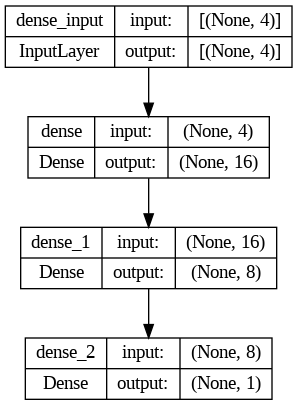

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
# Training
history = model.fit(X_train, y_train, 
          epochs= 200, 
          batch_size = 10,
          validation_split = 0.2, verbose=2)

Epoch 1/200
29/29 - 3s - loss: 31478.7207 - mse: 31478.7207 - val_loss: 22414.7695 - val_mse: 22414.7695 - 3s/epoch - 98ms/step
Epoch 2/200
29/29 - 0s - loss: 31393.1875 - mse: 31393.1875 - val_loss: 22334.2793 - val_mse: 22334.2793 - 242ms/epoch - 8ms/step
Epoch 3/200
29/29 - 0s - loss: 31284.6309 - mse: 31284.6309 - val_loss: 22232.7520 - val_mse: 22232.7520 - 265ms/epoch - 9ms/step
Epoch 4/200
29/29 - 0s - loss: 31145.0703 - mse: 31145.0703 - val_loss: 22103.0977 - val_mse: 22103.0977 - 98ms/epoch - 3ms/step
Epoch 5/200
29/29 - 0s - loss: 30971.7402 - mse: 30971.7402 - val_loss: 21943.6055 - val_mse: 21943.6055 - 75ms/epoch - 3ms/step
Epoch 6/200
29/29 - 0s - loss: 30758.3301 - mse: 30758.3301 - val_loss: 21746.5293 - val_mse: 21746.5293 - 87ms/epoch - 3ms/step
Epoch 7/200
29/29 - 0s - loss: 30494.7988 - mse: 30494.7988 - val_loss: 21513.5430 - val_mse: 21513.5430 - 83ms/epoch - 3ms/step
Epoch 8/200
29/29 - 0s - loss: 30193.8906 - mse: 30193.8906 - val_loss: 21257.2949 - val_mse: 21

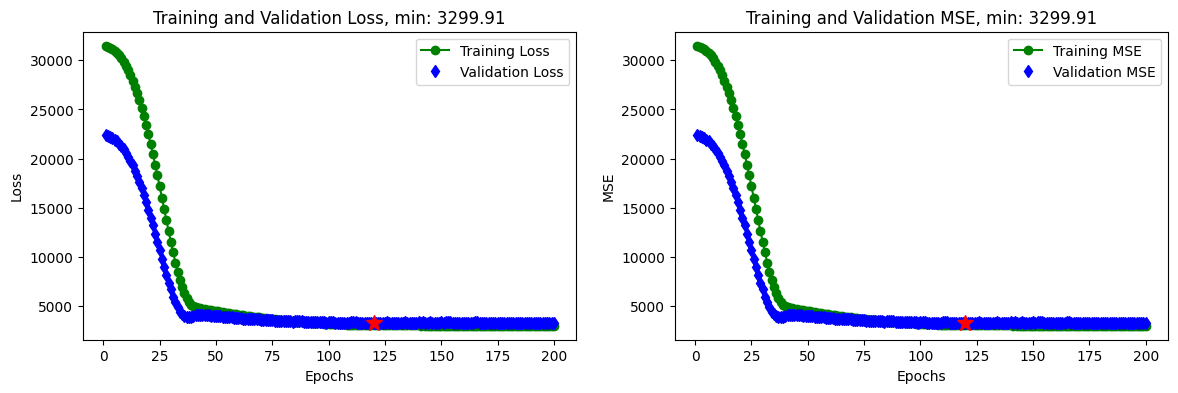

In [ ]:
# Training graphs
#
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mse = history_dict['mse']
val_mse = history_dict['val_mse']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, mse, 'go-', label='Training MSE') #, c='blue')
plt.plot(epochs, val_mse, 'bd', label='Validation MSE') #, c='red')
plt.plot(np.argmin(np.array(val_mse))+1,val_mse[np.argmin(np.array(val_mse))], 'r*', ms=12)
plt.title('Training and Validation MSE, min: ' + str(np.round(val_mse[np.argmin(np.array(val_mse))],2)))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
# test 데이터에 대한 평가
loss, mse = model.evaluate(X_test, y_test, verbose=2, batch_size=10)

print("테스트 세트의 MSE: {:5.2f} ".format(mse))

9/9 - 0s - loss: 2948.2852 - mse: 2948.2852 - 32ms/epoch - 4ms/step
테스트 세트의 MSE: 2948.29 


In [ ]:
# 예측
# 테스트 데이터에 있는 샘플을 사용해 target 값을 예측해 보겠습니다:
# target  a quantitative measure of disease progression one year after baseline
y_pred= model.predict(X_test, batch_size=10) 
y_pred

9/9 [==============================] - 0s 2ms/step


array([[153.11487 ],
       [167.20964 ],
       [167.59737 ],
       [274.56735 ],
       [141.12543 ],
       [ 98.62735 ],
       [266.54733 ],
       [216.76338 ],
       [101.91904 ],
       [133.51204 ],
       [ 97.98164 ],
       [153.514   ],
       [ 55.690548],
       [216.46942 ],
       [109.050674],
       [134.41159 ],
       [231.27634 ],
       [249.57335 ],
       [191.99907 ],
       [221.20091 ],
       [201.68721 ],
       [ 90.584724],
       [ 56.92568 ],
       [202.44232 ],
       [148.81973 ],
       [171.51326 ],
       [199.2016  ],
       [183.3313  ],
       [ 40.092598],
       [132.40332 ],
       [170.02478 ],
       [ 89.32263 ],
       [149.91847 ],
       [190.80154 ],
       [167.7519  ],
       [218.83186 ],
       [138.2259  ],
       [139.10591 ],
       [158.29997 ],
       [ 52.178627],
       [ 60.479053],
       [112.822624],
       [171.42403 ],
       [155.77382 ],
       [169.93678 ],
       [ 60.742382],
       [ 70.95751 ],
       [ 78.8

In [ ]:
# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
r2score = r2_score(y_test, y_pred)
print(f'r2_score: {r2score}')

mean_squared_errors: 2948.2853284739103
r2_score: 0.4435256918982392


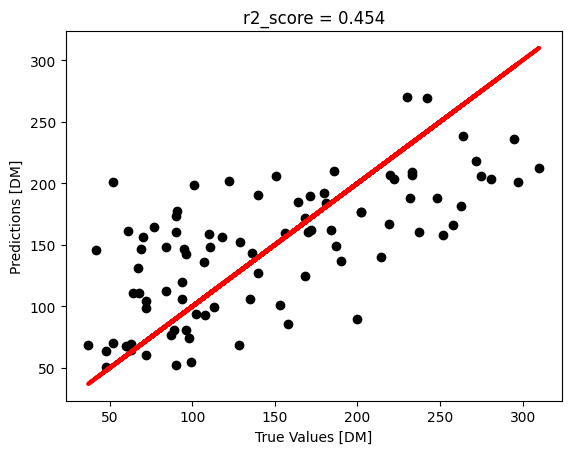

In [ ]:
plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test, y_test, 'r', linewidth=3)
plt.xlabel('True Values [DM]')
plt.ylabel('Predictions [DM]')
plt.title(f'r2_score = {np.round(r2score,3)}')
# plt.axis('equal')
# plt.axis('square')
plt.show()

## Summary
### r2_score
1. loss='mse',  optimizer ='rmsprop'  
    - 0.444 for X = df[['bmi', 'bp', 's3','s5']].values  
    - 0.452 for X = df[['bmi', 'bp', 's4','s5']].values  

2. loss='mse',  optimizer ='adam'  
    - 0.441 for X = df[['bmi', 'bp', 's3','s5']].values  
    - 0.459 for X = df[['bmi', 'bp', 's4','s5']].values  
> 반상관 특징인 s3를 정상관 특징인 s4로 대체하면 회기 성능이 개선된다.  

---
---

### [DIY] MLP Functional model을 구성해서 분석하시오.

In [ ]:
# Functional model
from keras import layers, models

inputs = layers.Input(shape=(4,))
x = Dense(16, activation='relu')(inputs)
x = Dense(8, activation='relu')(x)
output = Dense(1, activation='linear')(x)

model = models.Model(inputs=inputs, outputs=output)

optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer =optimizer,  metrics = ['mse'] )
# model.compile(loss = 'mse', optimizer ='adam',  metrics = ['mse'] )

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_3 (Dense)             (None, 16)                80        
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training
history = model.fit(X_train, y_train, 
          epochs= 200, 
          batch_size = 10,
          validation_split = 0.2, verbose=2)

Epoch 1/200
29/29 - 1s - loss: 31511.4141 - mse: 31511.4141 - val_loss: 22456.0957 - val_mse: 22456.0957 - 819ms/epoch - 28ms/step
Epoch 2/200
29/29 - 0s - loss: 31469.2695 - mse: 31469.2695 - val_loss: 22421.5176 - val_mse: 22421.5176 - 92ms/epoch - 3ms/step
Epoch 3/200
29/29 - 0s - loss: 31423.8164 - mse: 31423.8164 - val_loss: 22381.2266 - val_mse: 22381.2266 - 85ms/epoch - 3ms/step
Epoch 4/200
29/29 - 0s - loss: 31371.0918 - mse: 31371.0918 - val_loss: 22333.3613 - val_mse: 22333.3613 - 83ms/epoch - 3ms/step
Epoch 5/200
29/29 - 0s - loss: 31308.1484 - mse: 31308.1484 - val_loss: 22277.1035 - val_mse: 22277.1035 - 87ms/epoch - 3ms/step
Epoch 6/200
29/29 - 0s - loss: 31235.0215 - mse: 31235.0215 - val_loss: 22213.2207 - val_mse: 22213.2207 - 86ms/epoch - 3ms/step
Epoch 7/200
29/29 - 0s - loss: 31148.4258 - mse: 31148.4219 - val_loss: 22134.5859 - val_mse: 22134.5859 - 92ms/epoch - 3ms/step
Epoch 8/200
29/29 - 0s - loss: 31047.2402 - mse: 31047.2402 - val_loss: 22048.5957 - val_mse: 2

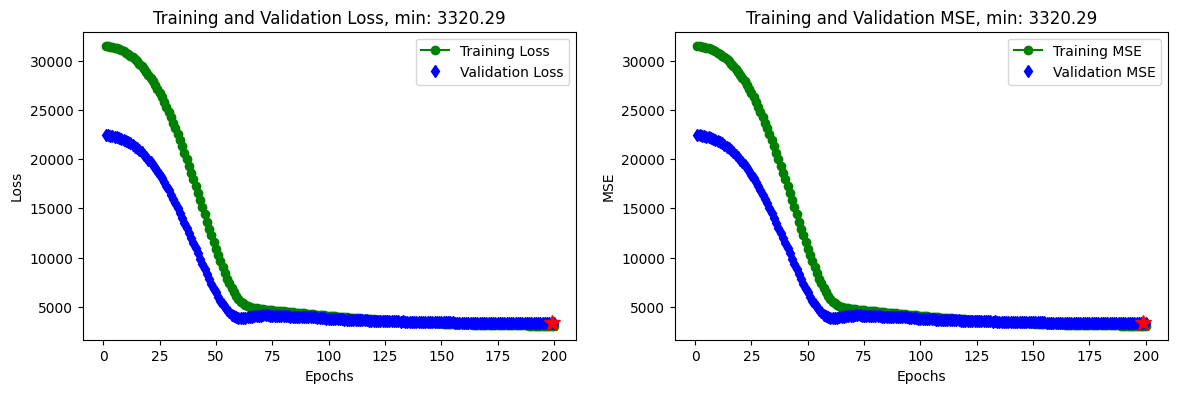

In [ ]:
# Training graphs
#
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mse = history_dict['mse']
val_mse = history_dict['val_mse']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, mse, 'go-', label='Training MSE') #, c='blue')
plt.plot(epochs, val_mse, 'bd', label='Validation MSE') #, c='red')
plt.plot(np.argmin(np.array(val_mse))+1,val_mse[np.argmin(np.array(val_mse))], 'r*', ms=12)
plt.title('Training and Validation MSE, min: ' + str(np.round(val_mse[np.argmin(np.array(val_mse))],2)))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
# test 데이터에 대한 평가
loss, mse = model.evaluate(X_test, y_test, verbose=2, batch_size=10)

print("테스트 세트의 MSE: {:5.2f} ".format(mse))

9/9 - 0s - loss: 2935.9214 - mse: 2935.9211 - 38ms/epoch - 4ms/step
테스트 세트의 MSE: 2935.92 


In [ ]:
# 예측
# 테스트 데이터에 있는 샘플을 사용해 target 값을 예측해 보겠습니다:
# target  a quantitative measure of disease progression one year after baseline

y_pred= model.predict(X_test, batch_size=10)  #.flatten()
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
r2score = r2_score(y_test, y_pred)
print(f'r2_score: {r2score}')


9/9 [==============================] - 0s 2ms/step
mean_squared_errors: 2935.9213023961147
r2_score: 0.44585934081293044


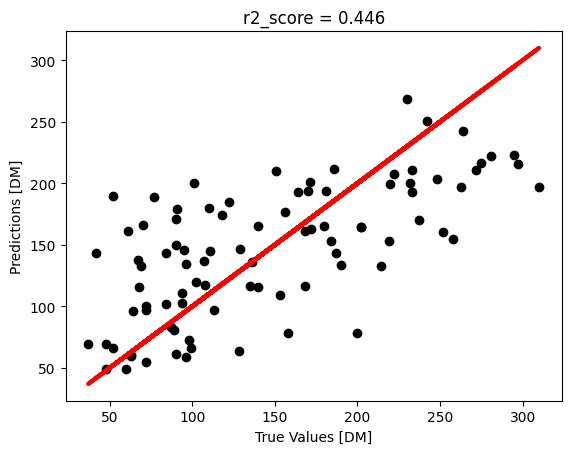

In [ ]:
plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test, y_test, 'r', linewidth=3)
plt.xlabel('True Values [DM]')
plt.ylabel('Predictionas [DM]')
plt.title(f'r2_score = {np.round(r2score,3)}')
# plt.axis('equal')
# plt.axis('square')
plt.show()

In [ ]:
# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

mean_squared_errors: 2935.9213023961147
r2_score: 0.44585934081293044


---
---
[DIY] 다음에 도전해서 아래에 완성하시오.
> MLP 딥러닝을 이용한 선형회기의 이해
---
---
# target의 값을 결정하는 중요한 특징을 변경
- 양의 상관성: bmi, bp, s5  || 반상관성 : s3

1. 양의 상관성 특징에서 bp를 제외하고 모델을 훈련
2. 양의 상관성 특징에 s4를 추가해서 모델을 훈련 (bp는 제거)
3. optimizer 또는 activation 을 변경해서 Sequential 또는 Functional 모델을 훈련
4. 위의 결과를 비교하는 결과 정리

- dlxx_prj01_mid_exam.ipynb 파일을 chaos21c@gmail.com 으로 첨부해서 보내세요.
    - 메일 제목: dlxx 이름



In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,7))
sns.heatmap(df.corr(), 
        xticklabels=df.columns,
        yticklabels=df.columns,
        vmin= -1, vmax=1.0, cmap='coolwarm',
        annot=True, fmt='.2f')
plt.show()

In [ ]:
df[['bmi','s3', 's4', 's5']].plot()

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(df[['bmi', 's3', 's4', 's5','target']])
plt.show()

In [ ]:
X = df[['bmi', 's3', 's4', 's5']].values
y = df[['target']].values

X.shape,y.shape, type(X),type(y)

((442, 4), (442, 1), numpy.ndarray, numpy.ndarray)

In [ ]:
y = np.squeeze(y, 1)
X.shape, y.shape

((442, 4), (442,))

In [ ]:
# train, test data
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((353, 4), (89, 4), (353,), (89,))

### Functional model

In [ ]:
# Functional model
from keras import layers, models

inputs = layers.Input(shape=(4,))
x = Dense(16, activation='relu')(inputs)
x = Dense(8, activation='relu')(x)
output = Dense(1, activation='linear')(x)

model = models.Model(inputs = inputs, outputs = output)

optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer = optimizer,  metrics = ['mse'] )

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_6 (Dense)             (None, 16)                80        
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training
history = model.fit(X_train, y_train, 
          epochs= 200, 
          batch_size = 10,
          validation_split = 0.2, verbose=2)

Epoch 1/200
29/29 - 1s - loss: 31480.1953 - mse: 31480.1992 - val_loss: 22421.8047 - val_mse: 22421.8047 - 863ms/epoch - 30ms/step
Epoch 2/200
29/29 - 0s - loss: 31401.9609 - mse: 31401.9609 - val_loss: 22351.7793 - val_mse: 22351.7793 - 90ms/epoch - 3ms/step
Epoch 3/200
29/29 - 0s - loss: 31301.4512 - mse: 31301.4512 - val_loss: 22259.3672 - val_mse: 22259.3672 - 85ms/epoch - 3ms/step
Epoch 4/200
29/29 - 0s - loss: 31178.8945 - mse: 31178.8906 - val_loss: 22148.1699 - val_mse: 22148.1699 - 94ms/epoch - 3ms/step
Epoch 5/200
29/29 - 0s - loss: 31028.0820 - mse: 31028.0820 - val_loss: 22012.4238 - val_mse: 22012.4238 - 91ms/epoch - 3ms/step
Epoch 6/200
29/29 - 0s - loss: 30845.1699 - mse: 30845.1699 - val_loss: 21855.8340 - val_mse: 21855.8340 - 82ms/epoch - 3ms/step
Epoch 7/200
29/29 - 0s - loss: 30641.2871 - mse: 30641.2871 - val_loss: 21674.6523 - val_mse: 21674.6523 - 91ms/epoch - 3ms/step
Epoch 8/200
29/29 - 0s - loss: 30403.9395 - mse: 30403.9395 - val_loss: 21465.3555 - val_mse: 2

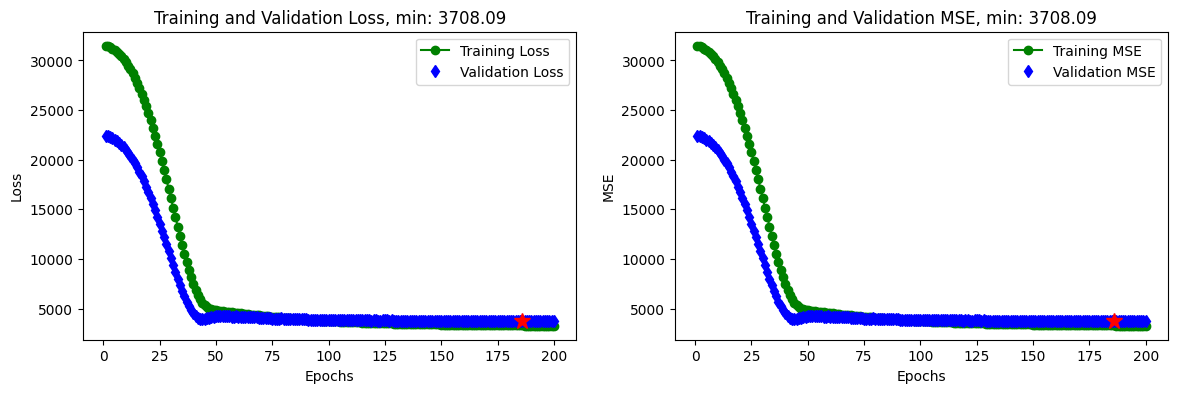

In [ ]:
# Training graphs
#
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mse = history_dict['mse']
val_mse = history_dict['val_mse']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, mse, 'go-', label='Training MSE') #, c='blue')
plt.plot(epochs, val_mse, 'bd', label='Validation MSE') #, c='red')
plt.plot(np.argmin(np.array(val_mse))+1,val_mse[np.argmin(np.array(val_mse))], 'r*', ms=12)
plt.title('Training and Validation MSE, min: ' + str(np.round(val_mse[np.argmin(np.array(val_mse))],2)))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
# test 데이터에 대한 평가
loss, mse = model.evaluate(X_test, y_test, verbose=2, batch_size=10)

print("테스트 세트의 MSE: {:5.2f} ".format(mse))

9/9 - 0s - loss: 2893.2815 - mse: 2893.2820 - 53ms/epoch - 6ms/step
테스트 세트의 MSE: 2893.28 


In [ ]:
# 예측
# 테스트 데이터에 있는 샘플을 사용해 target 값을 예측해 보겠습니다:
# target  a quantitative measure of disease progression one year after baseline

y_pred= model.predict(X_test, batch_size=10)  #.flatten()
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
r2score = r2_score(y_test, y_pred)
print(f'r2_score: {r2score}')

9/9 [==============================] - 0s 2ms/step
mean_squared_errors: 2893.281656140857
r2_score: 0.45390736364791173


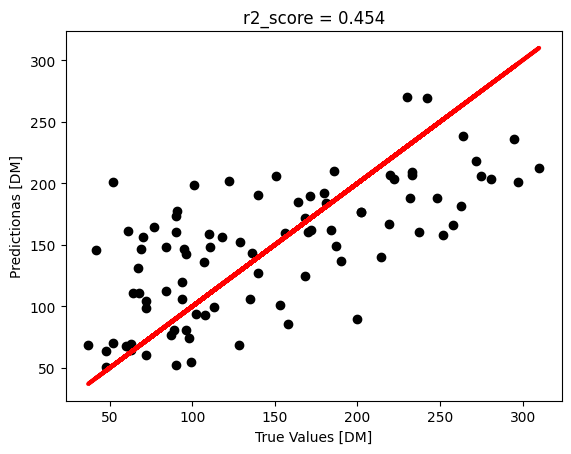

In [ ]:
plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test, y_test, 'r', linewidth=3)
plt.xlabel('True Values [DM]')
plt.ylabel('Predictionas [DM]')
plt.title(f'r2_score = {np.round(r2score,3)}')
# plt.axis('equal')
# plt.axis('square')
plt.show()

In [ ]:
# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

mean_squared_errors: 2893.281656140857
r2_score: 0.45390736364791173


### Sequential model

In [ ]:
# Sequential model
model = Sequential()
    
model.add(Dense(16, input_shape = (4,), activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))  #, activation = 'sigmoid'))
    
optimizer = tf.keras.optimizers.RMSprop(0.001)
model.compile(loss = 'mse', optimizer =optimizer,  metrics = ['mse'] )
    
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 16)                80        
                                                                 
 dense_16 (Dense)            (None, 8)                 136       
                                                                 
 dense_17 (Dense)            (None, 1)                 9         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
plot_model(model, show_shapes=True)

# Training
history = model.fit(X_train, y_train, 
          epochs= 200, 
          batch_size = 10,
          validation_split = 0.2, verbose=2)

Epoch 1/200
29/29 - 1s - loss: 31502.3555 - mse: 31502.3555 - val_loss: 22436.2305 - val_mse: 22436.2305 - 845ms/epoch - 29ms/step
Epoch 2/200
29/29 - 0s - loss: 31431.7480 - mse: 31431.7480 - val_loss: 22376.6426 - val_mse: 22376.6426 - 88ms/epoch - 3ms/step
Epoch 3/200
29/29 - 0s - loss: 31351.1426 - mse: 31351.1426 - val_loss: 22303.1172 - val_mse: 22303.1152 - 106ms/epoch - 4ms/step
Epoch 4/200
29/29 - 0s - loss: 31250.1738 - mse: 31250.1738 - val_loss: 22210.9648 - val_mse: 22210.9648 - 90ms/epoch - 3ms/step
Epoch 5/200
29/29 - 0s - loss: 31128.0957 - mse: 31128.0957 - val_loss: 22102.3984 - val_mse: 22102.3984 - 87ms/epoch - 3ms/step
Epoch 6/200
29/29 - 0s - loss: 30979.0781 - mse: 30979.0781 - val_loss: 21969.0859 - val_mse: 21969.0859 - 87ms/epoch - 3ms/step
Epoch 7/200
29/29 - 0s - loss: 30806.0957 - mse: 30806.0957 - val_loss: 21818.2500 - val_mse: 21818.2500 - 99ms/epoch - 3ms/step
Epoch 8/200
29/29 - 0s - loss: 30603.3945 - mse: 30603.3965 - val_loss: 21640.8477 - val_mse: 

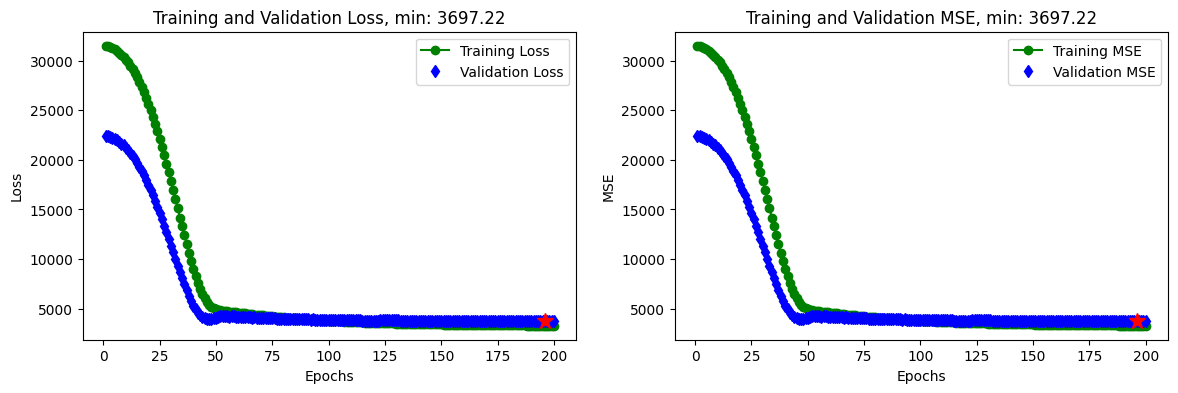

In [ ]:
# Training graphs
#
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],2)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

mse = history_dict['mse']
val_mse = history_dict['val_mse']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, mse, 'go-', label='Training MSE') #, c='blue')
plt.plot(epochs, val_mse, 'bd', label='Validation MSE') #, c='red')
plt.plot(np.argmin(np.array(val_mse))+1,val_mse[np.argmin(np.array(val_mse))], 'r*', ms=12)
plt.title('Training and Validation MSE, min: ' + str(np.round(val_mse[np.argmin(np.array(val_mse))],2)))
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

In [ ]:
# test 데이터에 대한 평가
loss, mse = model.evaluate(X_test, y_test, verbose=2, batch_size=10)

print("테스트 세트의 MSE: {:5.2f} ".format(mse))

9/9 - 0s - loss: 2892.7422 - mse: 2892.7422 - 41ms/epoch - 5ms/step
테스트 세트의 MSE: 2892.74 


In [ ]:
# 예측
# 테스트 데이터에 있는 샘플을 사용해 target 값을 예측해 보겠습니다:
# target  a quantitative measure of disease progression one year after baseline
y_pred= model.predict(X_test, batch_size=10) 
y_pred

9/9 [==============================] - 0s 2ms/step


array([[166.60225 ],
       [156.08147 ],
       [176.62949 ],
       [269.88516 ],
       [148.44562 ],
       [112.513504],
       [269.13745 ],
       [217.74971 ],
       [120.00354 ],
       [142.18718 ],
       [106.20706 ],
       [158.04576 ],
       [ 55.374046],
       [201.14954 ],
       [105.91189 ],
       [131.08948 ],
       [235.55829 ],
       [238.33308 ],
       [160.80032 ],
       [205.70995 ],
       [212.18225 ],
       [110.500374],
       [ 68.77886 ],
       [187.71198 ],
       [152.05826 ],
       [156.7785  ],
       [181.27194 ],
       [164.63152 ],
       [ 50.61834 ],
       [136.40857 ],
       [190.31825 ],
       [ 99.1617  ],
       [173.70607 ],
       [185.29166 ],
       [192.09521 ],
       [206.10645 ],
       [146.12244 ],
       [148.5823  ],
       [162.01213 ],
       [ 69.69397 ],
       [ 63.70624 ],
       [ 93.06961 ],
       [159.57182 ],
       [171.79163 ],
       [160.89426 ],
       [ 70.43899 ],
       [ 90.1404  ],
       [ 76.3

In [ ]:
# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
r2score = r2_score(y_test, y_pred)
print(f'r2_score: {r2score}')

mean_squared_errors: 2892.742050922351
r2_score: 0.4540092114703447


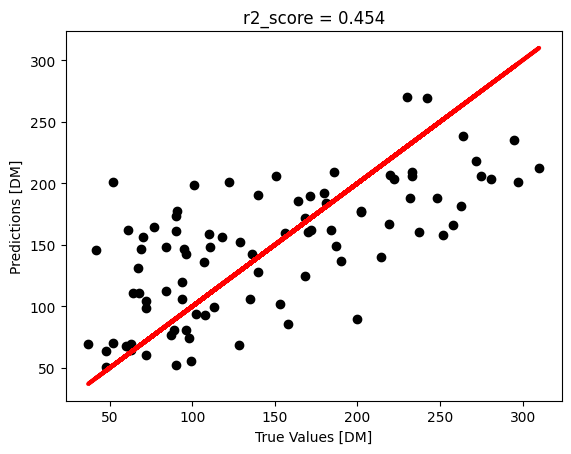

In [ ]:
plt.scatter(y_test, y_pred,  color='black')
plt.plot(y_test, y_test, 'r', linewidth=3)
plt.xlabel('True Values [DM]')
plt.ylabel('Predictions [DM]')
plt.title(f'r2_score = {np.round(r2score,3)}')
# plt.axis('equal')
# plt.axis('square')
plt.show()

In [ ]:
# 테스트데이터에 대한 최종 평가
from sklearn.metrics import mean_squared_error, r2_score
print('mean_squared_errors: {}'.format(mean_squared_error(y_test, y_pred)))
print('r2_score: {}'.format(r2_score(y_test, y_pred)))

mean_squared_errors: 2892.742050922351
r2_score: 0.4540092114703447
